# THE SPARKS FOUNDATION - GRIP

## Data Science and Business Analytics Internship - July 2021 

## Task 2: Prediction using Unsupervised ML (Level - Beginner)

## Task Description: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

# Author: Vasudha SN

In [4]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

In [5]:
# Reading the Data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Finding the Within Cluster Sum of Squares (WCSS)
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

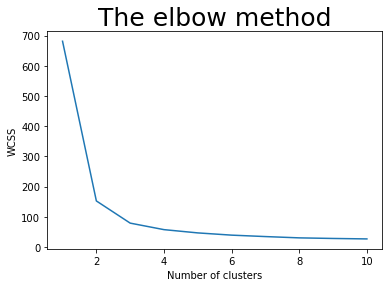

In [12]:
# Plot WCSS values to find the Elbow value aka the number of clusters/centroids.
plt.plot(range(1, 11), wcss)
plt.title('The elbow method', size=25)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration..

### Hence, the optimum number of clusters / Centroids = 3 ¶

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 0)
y_kmeans = kmeans.fit_predict(x)


In [9]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


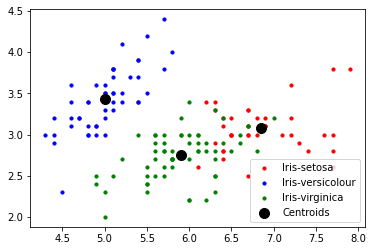

In [10]:
# Plot the scatter plot of the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

### From the above scatter plot, we can visualize 3 clusters as predicted accurately using Elbow Method. We can conclude that the dataset contains 3 species of Iris: 'Iris-setosa', 'Iris-versicolour', 'Iris-virginica' along with their centroids. 